In [114]:
#Khai báo các thư viện
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import plot_model

In [115]:
#Kết nối google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
#Import datasets
batch_size = 2
img_size = (150, 150)
img_path = '/content/drive/MyDrive/PROJECT AI CUỐI KỲ/train'

In [117]:
# Tạo thêm dữ liệu hình ảnh tensor (augmentation) với tăng dữ liệu thời gian thực, với các tham số # có ý nghĩa như sau:
# - rescale: chia các giá trị của các điểm ảnh cho 255 (hội tụ)
# - brightness_range: augment ảnh sáng lên từ mức 0.8 đến 1.2
# - zoom_range: zoom ảnh từ giá trị 0.9 đến 1,2
# - validation_split: phân chia tập train và tập valid với tỉ lệ 80:20
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)
# Load dữ liệu tập train vào biến train_dataset
train_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
# Load dữ liệu tập valid vào biến validation_dataset
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 1260 images belonging to 5 classes.
Found 312 images belonging to 5 classes.


In [118]:
# In ra các giá trị của classes
train_dataset.classes
print(train_dataset.class_indices)

{'bicycle': 0, 'bus': 1, 'car': 2, 'motorcycle': 3, 'truck': 4}


In [119]:
# Tạo model với các layer như sau:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_33 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                      

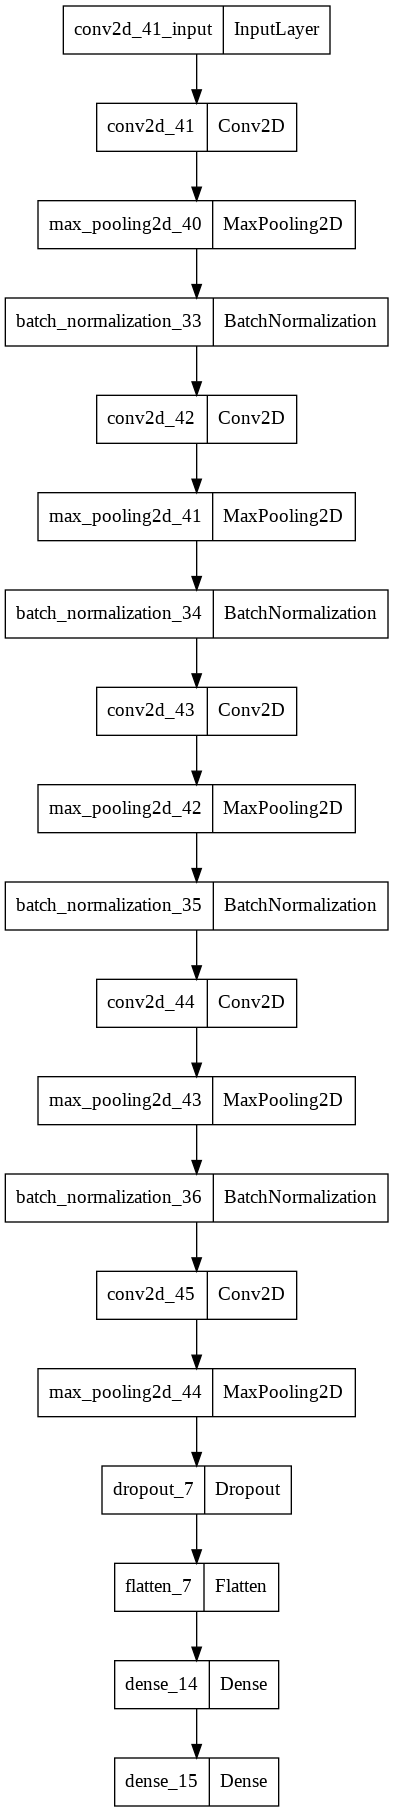

In [120]:
# Hiển thị ảnh model
plot_model(model)

In [121]:
# Các thư viện dùng để tối ưu quá trình train
# - SGD: Stochastic gradient descent  optimizer.
# - tensorflow.keras.callbacks.EarlyStopping: dùng để dừng quá trình chạy train khi model không cải thiện trong một số lượng epoch mà ta cho
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [122]:
# Train model
history = model.fit(train_dataset, batch_size=65, epochs=20, validation_data=validation_dataset)

Epoch 1/20
 28/630 [>.............................] - ETA: 39s - loss: 0.6168 - accuracy: 0.2857

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


474/630 [=====================>........] - ETA: 7s - loss: 0.4026 - accuracy: 0.5369

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


630/630 [==============================] - 40s 62ms/step - loss: 0.3801 - accuracy: 0.5690 - val_loss: 0.3883 - val_accuracy: 0.5224
Epoch 2/20
630/630 [==============================] - 40s 63ms/step - loss: 0.2147 - accuracy: 0.7944 - val_loss: 0.2389 - val_accuracy: 0.7596
Epoch 3/20
630/630 [==============================] - 39s 62ms/step - loss: 0.1359 - accuracy: 0.8889 - val_loss: 0.2876 - val_accuracy: 0.6763
Epoch 4/20
630/630 [==============================] - 40s 63ms/step - loss: 0.0731 - accuracy: 0.9556 - val_loss: 0.2313 - val_accuracy: 0.7788
Epoch 5/20
630/630 [==============================] - 40s 63ms/step - loss: 0.0382 - accuracy: 0.9810 - val_loss: 0.2510 - val_accuracy: 0.8013
Epoch 6/20
630/630 [==============================] - 41s 65ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.2757 - val_accuracy: 0.7660
Epoch 7/20
630/630 [==============================] - 39s 63ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.2630 - val_accuracy: 0.7917
Epo

In [124]:
model.predict(train_dataset)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


array([[2.8512973e-10, 6.3001015e-13, 1.1926374e-10, 1.0000000e+00,
        5.2163351e-10],
       [1.0000000e+00, 1.2517496e-12, 6.6191982e-12, 9.5303357e-12,
        3.6276421e-13],
       [6.5380874e-09, 1.0000000e+00, 6.5869345e-11, 1.6567576e-10,
        6.8077748e-09],
       ...,
       [4.0356534e-07, 6.8803643e-09, 3.4669593e-08, 9.9999964e-01,
        8.9402192e-09],
       [2.3559302e-11, 2.1797881e-16, 1.0000000e+00, 8.5488257e-15,
        3.0947388e-15],
       [6.1517721e-11, 2.4092525e-11, 1.6647282e-09, 1.0000000e+00,
        8.8055889e-11]], dtype=float32)

In [125]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Giá trị dự đoán: motorcycle 
99.99998807907104 %


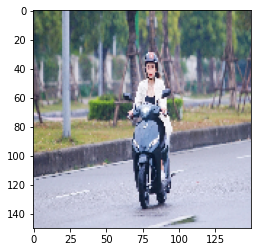

In [126]:
# Test kết quả

filename = "/content/drive/MyDrive/PROJECT AI CUỐI KỲ/test/xemay.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Giá trị dự đoán: bicycle ")
if(test ==1):
    print("Giá trị dự đoán: bus ")
if(test ==2):
    print("Giá trị dự đoán: car ")
if(test ==3):
    print("Giá trị dự đoán: motorcycle ")
if(test ==4):
    print("Giá trị dự đoán: truck ")
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

Giá trị dự đoán: bus 
99.99808073043823 %


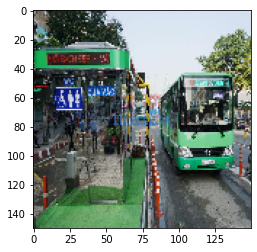

In [133]:
# Test kết quả

filename = "/content/drive/MyDrive/PROJECT AI CUỐI KỲ/test/xebusvietnam.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Giá trị dự đoán: bicycle ")
if(test ==1):
    print("Giá trị dự đoán: bus ")
if(test ==2):
    print("Giá trị dự đoán: car ")
if(test ==3):
    print("Giá trị dự đoán: motorcycle ")
if(test ==4):
    print("Giá trị dự đoán: truck ")
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

Giá trị dự đoán: car 
98.93982410430908 %


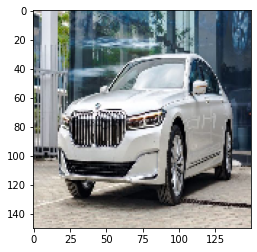

In [135]:
# Test kết quả

filename = "/content/drive/MyDrive/PROJECT AI CUỐI KỲ/test/xeoto01.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Giá trị dự đoán: bicycle ")
if(test ==1):
    print("Giá trị dự đoán: bus ")
if(test ==2):
    print("Giá trị dự đoán: car ")
if(test ==3):
    print("Giá trị dự đoán: motorcycle ")
if(test ==4):
    print("Giá trị dự đoán: truck ")
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

Giá trị dự đoán: truck 
99.99994039535522 %


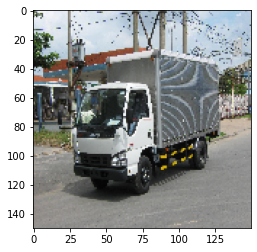

In [129]:
# Test kết quả

filename = "/content/drive/MyDrive/PROJECT AI CUỐI KỲ/test/gia-xe-tai-isuzu-1t4.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Giá trị dự đoán: bicycle ")
if(test ==1):
    print("Giá trị dự đoán: bus ")
if(test ==2):
    print("Giá trị dự đoán: car ")
if(test ==3):
    print("Giá trị dự đoán: motorcycle ")
if(test ==4):
    print("Giá trị dự đoán: truck ")
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

 Giá trị dự đoán: bicycle 
99.82062578201294 %


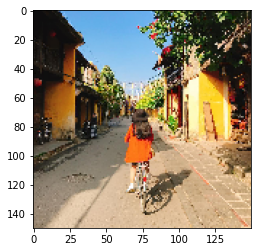

In [132]:
# Test kết quả

filename = "/content/drive/MyDrive/PROJECT AI CUỐI KỲ/test/xedap01.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Giá trị dự đoán: bicycle ")
if(test ==1):
    print("Giá trị dự đoán: bus ")
if(test ==2):
    print("Giá trị dự đoán: car ")
if(test ==3):
    print("Giá trị dự đoán: motorcycle ")
if(test ==4):
    print("Giá trị dự đoán: truck ")
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')